# Final Project Part III

## Exploratory Data Analysis

### Using the full data set of good, products and prior customer orders

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

In [2]:
goods = pd.read_csv('goods.csv')
orders = pd.read_csv('orders.csv')

In [3]:
order_products__train = pd.read_csv('order_products__train.csv')
order_products__prior = pd.read_csv('order_products__prior.csv')

### Exploring the main components of the data sets .head(), .info(), .describe()

#### Goods .head() .info() .describe()

In [4]:
goods.head()

,product_id,product_name,aisle_id,department_id,aisle,department
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks
1,2,All-Seasons Salt,104,13,spices seasonings,pantry
2,3,Robust Golden Unsweetened Oolong Tea,94,7,tea,beverages
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen meals,frozen
4,5,Green Chile Anytime Sauce,5,13,marinades meat preparation,pantry


In [5]:
# The goods data frame has an index, three columns as integers for ids and 
# three columns as text for product name, aisle name and department name
goods.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 6 columns):
product_id       49688 non-null int64
product_name     49688 non-null object
aisle_id         49688 non-null int64
department_id    49688 non-null int64
aisle            49688 non-null object
department       49688 non-null object
dtypes: int64(3), object(3)
memory usage: 2.3+ MB


In [6]:
goods.describe()

,product_id,aisle_id,department_id
count,49688.000000,49688.000000,49688.000000
mean,24844.500000,67.769582,11.728687
std,14343.834425,38.316162,5.850410
min,1.000000,1.000000,1.000000
25%,12422.750000,35.000000,7.000000
50%,24844.500000,69.000000,13.000000
75%,37266.250000,100.000000,17.000000
max,49688.000000,134.000000,21.000000


#### Verifying the number of products in the goods data frame

In [7]:
goods['product_id'].unique()

array([    1,     2,     3, ..., 49686, 49687, 49688])

In [8]:
# The last product in the goods data frame
goods.loc[49687:]

,product_id,product_name,aisle_id,department_id,aisle,department
49687,49688,Fresh Foaming Cleanser,73,11,facial care,personal care


The dataset has 49688 unique product items. In the describe table we can see that the max value for aisle id is 134 and 21 for departments id.

#### Orders .head() .info() .describe()

In [9]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [10]:
orders.info()
# All columns in this data frame are integers apart from eval_set which is a category 
# and we will explore it further down, also days_since_prior_order is a float so the number has decimal points

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
order_id                  int64
user_id                   int64
eval_set                  object
order_number              int64
order_dow                 int64
order_hour_of_day         int64
days_since_prior_order    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB


In [11]:
orders.describe()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06,3.214874e+06
mean,1.710542e+06,1.029782e+05,1.715486e+01,2.776219e+00,1.345202e+01,1.111484e+01
std,9.875817e+05,5.953372e+04,1.773316e+01,2.046829e+00,4.226088e+00,9.206737e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.552715e+05,5.139400e+04,5.000000e+00,1.000000e+00,1.000000e+01,4.000000e+00
50%,1.710542e+06,1.026890e+05,1.100000e+01,3.000000e+00,1.300000e+01,7.000000e+00
75%,2.565812e+06,1.543850e+05,2.300000e+01,5.000000e+00,1.600000e+01,1.500000e+01
max,3.421083e+06,2.062090e+05,1.000000e+02,6.000000e+00,2.300000e+01,3.000000e+01


#### days_since_prior_order as a float type

In [12]:
orders['days_since_prior_order'].unique()
# As per below I can't see any floating points so this column could as well be of type integer
# Although this distinction shouldn't cause any issue here

array([ nan,  15.,  21.,  29.,  28.,  19.,  20.,  14.,   0.,  30.,  10.,
         3.,   8.,  13.,  27.,   6.,   9.,  12.,   7.,  17.,  11.,  22.,
         4.,   5.,   2.,  23.,  26.,  25.,  16.,   1.,  18.,  24.])

#### Orders prior .head() .info() .describe()
#### This data set contains all the orders each user made apart from their last order

In [13]:
order_products__prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [14]:
order_products__prior.info()
# All columns in this data frame are of type integer

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 4 columns):
order_id             int64
product_id           int64
add_to_cart_order    int64
reordered            int64
dtypes: int64(4)
memory usage: 989.8 MB


In [15]:
order_products__prior.describe()

,order_id,product_id,add_to_cart_order,reordered
count,3.243449e+07,3.243449e+07,3.243449e+07,3.243449e+07
mean,1.710749e+06,2.557634e+04,8.351076e+00,5.896975e-01
std,9.873007e+05,1.409669e+04,7.126671e+00,4.918886e-01
min,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,8.559430e+05,1.353000e+04,3.000000e+00,0.000000e+00
50%,1.711048e+06,2.525600e+04,6.000000e+00,1.000000e+00
75%,2.565514e+06,3.793500e+04,1.100000e+01,1.000000e+00
max,3.421083e+06,4.968800e+04,1.450000e+02,1.000000e+00


#### order_products__prior verifying the data per columns

In [16]:
order_products__prior['reordered'].value_counts()
# The value of the reordered is either 0 or 1

1    19126536
0    13307953
Name: reordered, dtype: int64

In [17]:
print('The first product id in our goods data set that has been purchased is %s' %order_products__prior['product_id'].min())
print('Which is %s' %goods[goods['product_id'] == order_products__prior['product_id'].min()]['product_name'][0])
print('The last product id in our goods data set that has been purchased is %s' %order_products__prior['product_id'].max())
#TODO to not show the index
#print('Which is %s' %goods[goods['product_id'] == order_products__prior['product_id'].max()].ix[:,'product_name'])
print('This is indeed the and first and last product in our goods dataset')


The first product id in our goods data set that has been purchased is 1
Which is Chocolate Sandwich Cookies
The last product id in our goods data set that has been purchased is 49688
This is indeed the and first and last product in our goods dataset


In [18]:
print('The maximum number of products in a cart %s' %order_products__prior['add_to_cart_order'].max())
print('The minimum number of products in a cart %s' %order_products__prior['add_to_cart_order'].min())

The maximum number of products in a cart 145
The minimum number of products in a cart 1


#### Orders train .head() .info() .describe()
#### This data set contains the last order each user made

In [19]:
order_products__train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [20]:
order_products__train.info()
# All columns in this data frame are of type integer

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384617 entries, 0 to 1384616
Data columns (total 4 columns):
order_id             1384617 non-null int64
product_id           1384617 non-null int64
add_to_cart_order    1384617 non-null int64
reordered            1384617 non-null int64
dtypes: int64(4)
memory usage: 42.3 MB


In [21]:
order_products__train.describe()

,order_id,product_id,add_to_cart_order,reordered
count,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06
mean,1.706298e+06,2.555624e+04,8.758044e+00,5.985944e-01
std,9.897326e+05,1.412127e+04,7.423936e+00,4.901829e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,8.433700e+05,1.338000e+04,3.000000e+00,0.000000e+00
50%,1.701880e+06,2.529800e+04,7.000000e+00,1.000000e+00
75%,2.568023e+06,3.794000e+04,1.200000e+01,1.000000e+00
max,3.421070e+06,4.968800e+04,8.000000e+01,1.000000e+00


#### order_products__train veryfing the data per columns

In [22]:
order_products__train['reordered'].value_counts()
# The number of reordered items in our training dataset with 0 and 1

1    828824
0    555793
Name: reordered, dtype: int64

In [23]:
print('The first product id in our goods data set that has been purchased is %s' %order_products__train['product_id'].min())
print('The last product id in our goods data set that has been purchased is %s' %order_products__train['product_id'].max())
print('The first and last products in our goods dataset have also been purchased')

The first product id in our goods data set that has been purchased is 1
The last product id in our goods data set that has been purchased is 49688
The first and last products in our goods dataset have also been purchased


#### Orders dataset contains information on orders for prior, train and test files

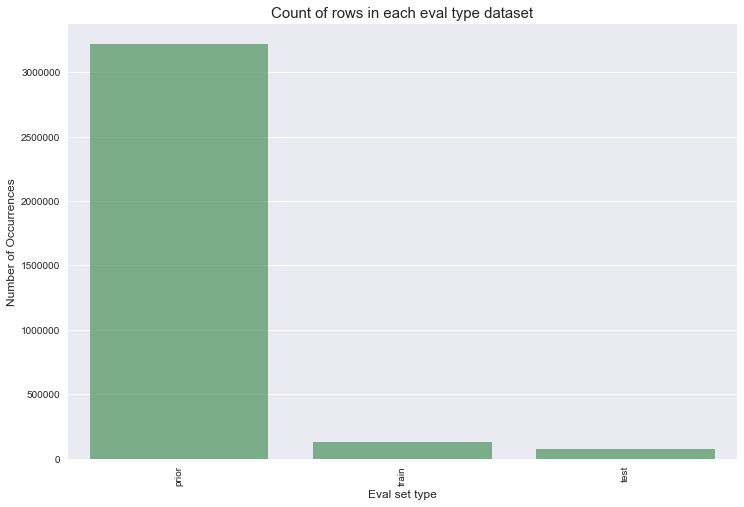

In [24]:
count_sets = orders['eval_set'].value_counts()

plt.figure(figsize=(12,8))
sns.barplot(count_sets.index, count_sets.values, alpha=0.8, color=color[1])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Eval set type', fontsize=12)
plt.title('Count of rows in each eval type dataset', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

In [25]:
print('Prior %s' %(count_sets.prior/count_sets.sum()))
print('Train %s' %(count_sets.train/count_sets.sum()))
print('Test %s' %(count_sets.test/count_sets.sum()))

Prior 0.939724058142
Train 0.0383530595428
Test 0.0219228823153


It looks like 94% of the data we are given form part of the prior data set and only around 4% and 2% for are train and test data sets respectively

In [26]:
orders[orders['eval_set'] == 'prior'].head(2)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0


In [27]:
orders[orders['eval_set'] == 'test'].head(2)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
38,2774568,3,test,13,5,15,11.0
44,329954,4,test,6,3,12,30.0


In [28]:
orders[orders['eval_set'] == 'train'].head(2)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
10,1187899,1,train,11,4,8,14.0
25,1492625,2,train,15,1,11,30.0


In [29]:
print('The number of unique customers in prior dataset %d' %len(np.unique(orders[orders['eval_set'] == 'prior']['user_id'])))
print('The number of unique customers in train dataset %d' %len(np.unique(orders[orders['eval_set'] == 'train']['user_id'])))
print('The number of unique customers in test dataset %d' %len(np.unique(orders[orders['eval_set'] == 'test']['user_id'])))

The number of unique customers in prior dataset 206209
The number of unique customers in train dataset 131209
The number of unique customers in test dataset 75000


So there are 206,209 customers in total. Out of which, the last purchase of 131,209 customers are given as train set and we need to predict for the rest 75,000 customers.

### Any missing data ?

In [30]:
orders.isnull().sum()

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

In [31]:
orders.count()

order_id                  3421083
user_id                   3421083
eval_set                  3421083
order_number              3421083
order_dow                 3421083
order_hour_of_day         3421083
days_since_prior_order    3214874
dtype: int64

Days since prior order column in the Orders data set contains 206,209 cells with a NaN value.

This makes sense as there are 206,209 unique customers in this data set and that's how many first orders they have made. For the first order made this column is not applicable.

In [32]:
goods.isnull().sum()

product_id       0
product_name     0
aisle_id         0
department_id    0
aisle            0
department       0
dtype: int64

In [33]:
goods.count()

product_id       49688
product_name     49688
aisle_id         49688
department_id    49688
aisle            49688
department       49688
dtype: int64

In [34]:
order_products__train.isnull().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

In [35]:
order_products__train.count()

order_id             1384617
product_id           1384617
add_to_cart_order    1384617
reordered            1384617
dtype: int64

In [36]:
order_products__prior.isnull().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

In [37]:
order_products__prior.count()

order_id             32434489
product_id           32434489
add_to_cart_order    32434489
reordered            32434489
dtype: int64

There isn't any other missing data in our data set at a first glance. We will check again once the data has been merged.

## Visualisations

In [38]:
# Orders combined with prior orders set
orders_prior = orders[orders['eval_set'] == 'prior']
product_orders = orders_prior.merge(order_products__prior, on='order_id', how='left')

In [39]:
reordered = product_orders[product_orders['reordered']==1]

In [40]:
# A function on the plot labels
def labels(x, y, title):
    plt.ylabel(y, fontsize=12)
    plt.xlabel(x, fontsize=12)
    plt.title(title, fontsize=19)

### 1. How many orders did a customer make in the data set ?

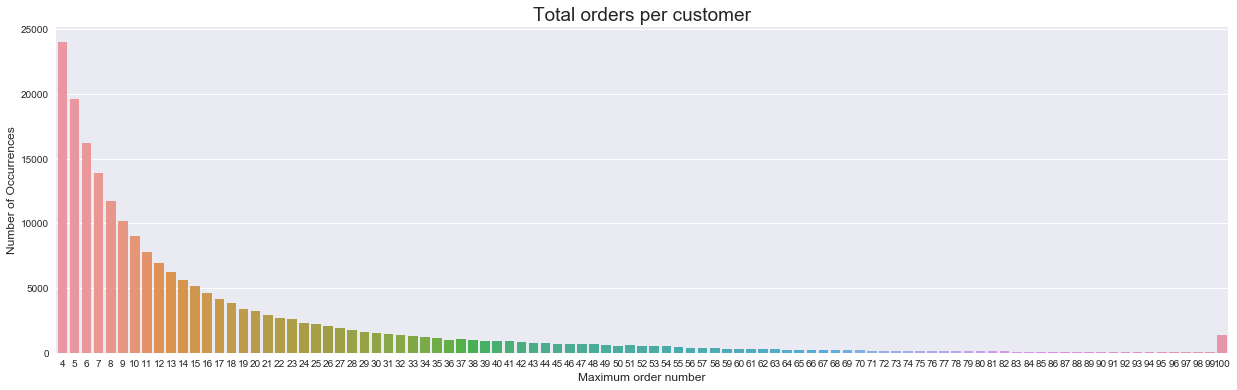

In [41]:
size = pd.DataFrame(orders.groupby(["user_id"]).size(),columns=['order_count'])
plt.figure(figsize=(21,6))
sns.countplot(data=size, x='order_count')
labels('Maximum order number', 'Number of Occurrences', 'Total orders per customer')

Number of orders made per customer are between 4 and 100

### 1.1 How many of total orders are reorders ?

In [46]:
reordered.groupby(["user_id", 'product_id']).size().head(15)

user_id  product_id
1        196           9
         10258         8
         12427         9
         13032         2
         13176         1
         25133         7
         26088         1
         26405         1
         46149         2
         49235         1
2        1559          5
         2002          3
         2573          1
         7781          2
         9681          1
dtype: int64

In [52]:
reordered.groupby(["user_id", 'product_id']).size().groupby(level=0).count().head(15)

user_id
1     10
2     37
3     19
4      1
5      8
6      2
7     40
8     10
9     17
10    31
11    18
12     9
13    13
14    30
15     9
dtype: int64

(0, 50)

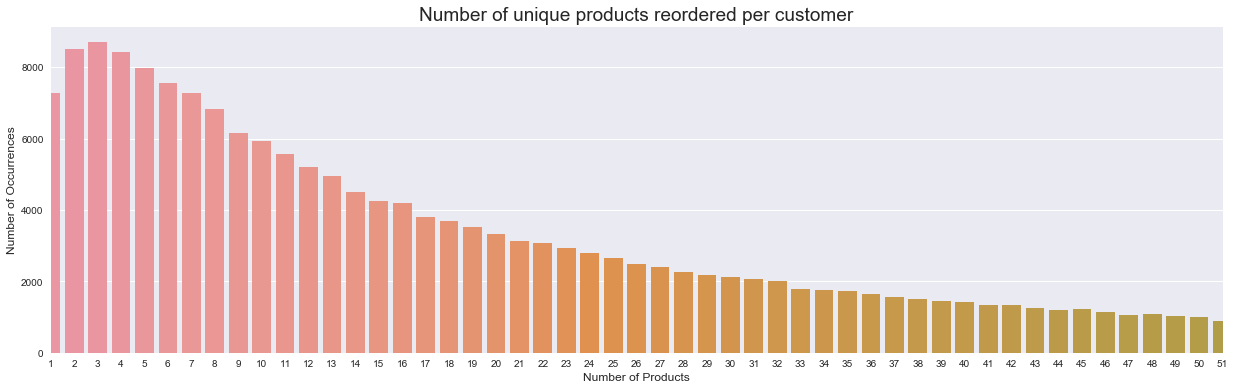

In [54]:
size = pd.DataFrame(reordered.groupby(["user_id", 'product_id']).size().groupby(level=0).count(),columns=['order_count'])
plt.figure(figsize=(21,6))
sns.countplot(data=size, x='order_count')
labels('Number of Products', 'Number of Occurrences', 'Number of unique products reordered per customer')
# Zoom in by 50%
plt.xlim(0,50)

### 2. When do customers order ?

#### Hour of the Day:

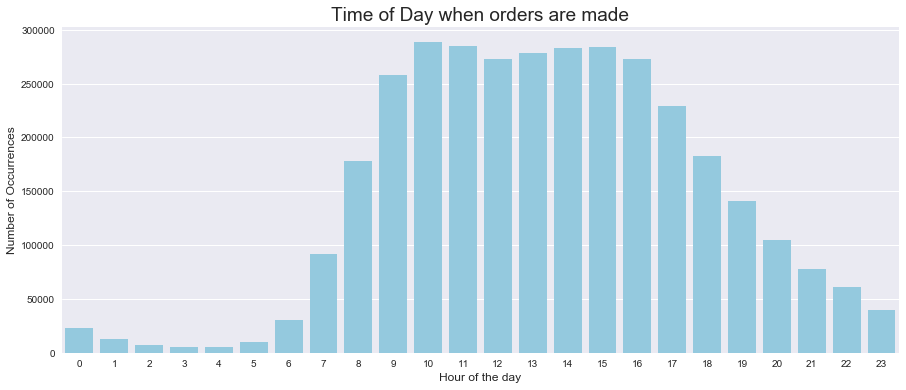

In [55]:
plt.figure(figsize=(15,6))
sns.countplot(data=orders, x='order_hour_of_day', color="skyblue")
labels('Hour of the day', 'Number of Occurrences', 'Time of Day when orders are made')

It looks like a lot of shoping is done during work hours

In [ ]:
#TODO
#sns.factorplot(x="order_hour_of_day", hue="reorder", data=product_orders,size=6, kind="bar", palette="muted")

Shopping on day of the week 0 vs shopping on day of the week 1:

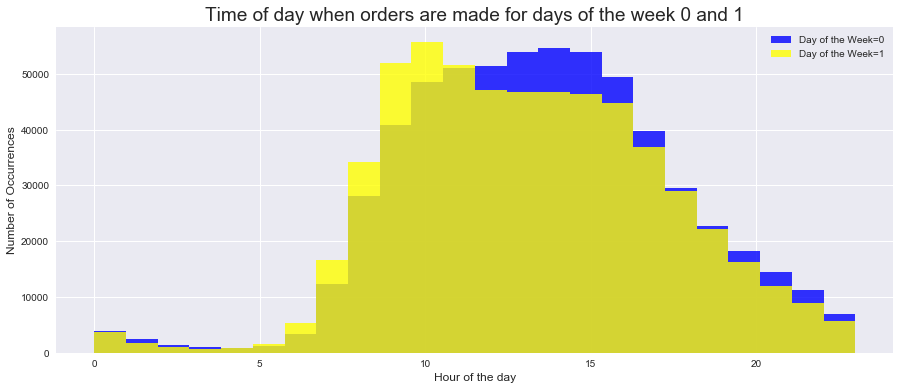

In [58]:
plt.figure(figsize=(15,6))
orders[orders['order_dow'] == 0]['order_hour_of_day'].hist(alpha=0.8,bins=24,color='blue',label='Day of the Week=0')
orders[orders['order_dow'] == 1]['order_hour_of_day'].hist(alpha=0.8,bins=24,color='yellow',label='Day of the Week=1')
plt.legend()
labels('Hour of the day', 'Number of Occurrences', 'Time of day when orders are made for days of the week 0 and 1')

The peak for shopping on Day of the week 0 is in the afternoon, where as the peak for shopping on day of the week 1 is in the morning.

It is likely that Day of the Week 0 is a Sunday, as people would be doing their shopping preparing for the week ahead and are more likely to be ordering on the afternoon.

#### Day of the Week:

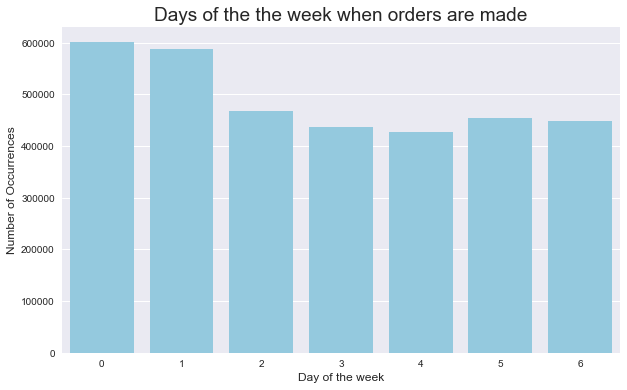

In [60]:
plt.figure(figsize=(10,6))
sns.countplot(data=orders, x='order_dow', color="skyblue")
labels('Day of the week', 'Number of Occurrences', 'Days of the the week when orders are made')

Although not 100% clear whether 0 is Saturday, Sunday or Monday, it looks like 2 days of the week get a few more orders compared to other days in the week

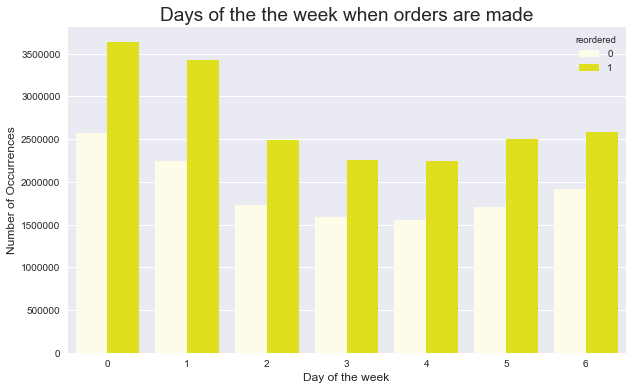

In [91]:
plt.figure(figsize=(10,6))
sns.countplot(data=product_orders, x='order_dow', color="yellow", hue='reordered')
labels('Day of the week', 'Number of Occurrences', 'Days of the the week when orders are made')

### 3. When does the customer make another order ?

People predominantly tend to order every 7 days. There is a small number of aditional orders placed on the same day as well. Anyone who made their ordered more than 30 days prior seem to be have been truncated to 30 days

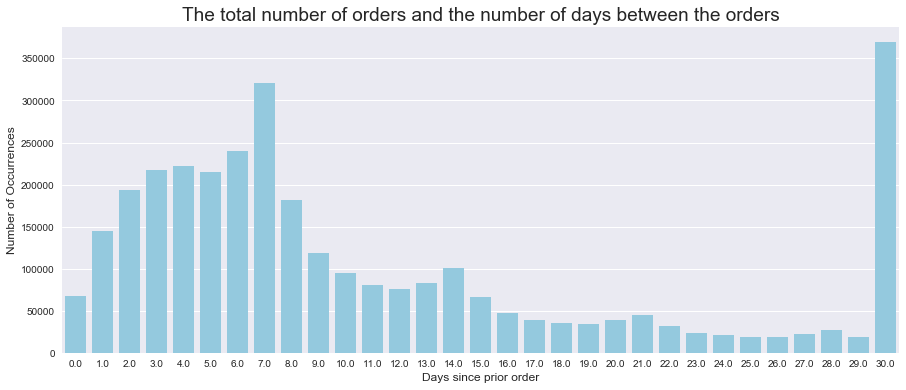

In [62]:
plt.figure(figsize=(15,6))
sns.countplot(data=orders, x='days_since_prior_order', color='skyblue')
labels('Days since prior order', 'Number of Occurrences', 'The total number of orders and the number of days between the orders')

Please note the scale difference between the charts above and below.

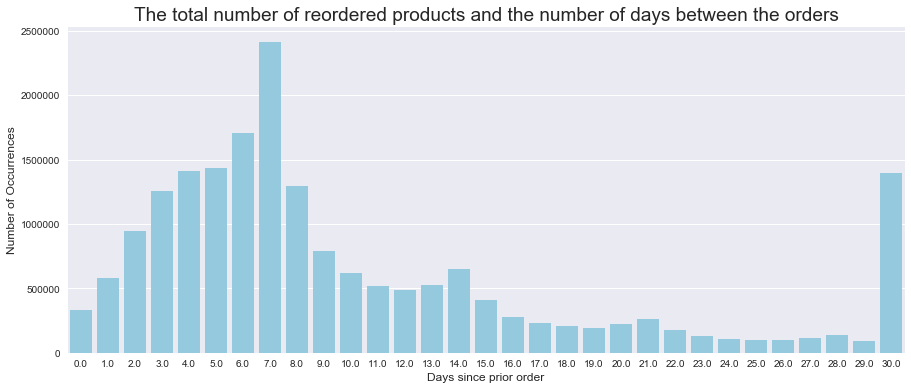

In [71]:
plt.figure(figsize=(15,6))
sns.countplot(data=reordered, x='days_since_prior_order', color='skyblue')
labels('Days since prior order', 'Number of Occurrences', 'The total number of reordered products and the number of days between the orders')

Combining day of the week and hour of the day to produce a heat map

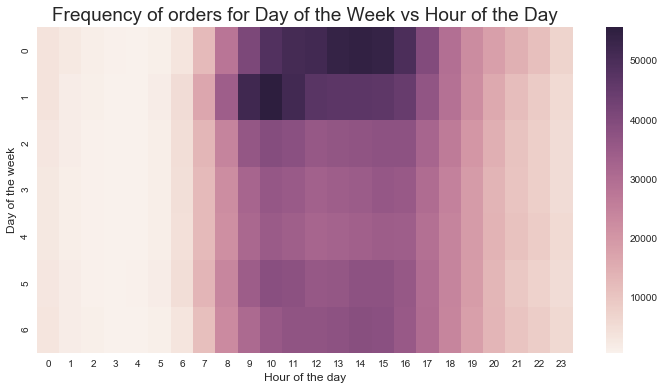

In [64]:
grouped_df = orders.groupby(["order_dow", "order_hour_of_day"])["order_number"].aggregate("count").reset_index()
grouped_df = grouped_df.pivot('order_dow', 'order_hour_of_day', 'order_number')

plt.figure(figsize=(12,6))
sns.heatmap(grouped_df)
labels('Hour of the day', 'Day of the week', "Frequency of orders for Day of the Week vs Hour of the Day")

The heat map confirms what we've observed above. The most popular days for order are Day 0 and Day 1. With afternoon being the most popular for day 0 and morning being the most popular for Day 1. 

Lower down we will examine how date and time affect the number of reordered items.

### 4. How many items do people buy ?

We are going to take a subset of rder in our traning prior dataset 

In [65]:
product_orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,2539329,1,prior,1,2,8,NaN,196,1,0
1,2539329,1,prior,1,2,8,NaN,14084,2,0
2,2539329,1,prior,1,2,8,NaN,12427,3,0
3,2539329,1,prior,1,2,8,NaN,26088,4,0
4,2539329,1,prior,1,2,8,NaN,26405,5,0


days_since_prior_order is NaN as it is customers first order

Find what is the total number of products in an order by using product_orders['add_to_cart_order'].max()

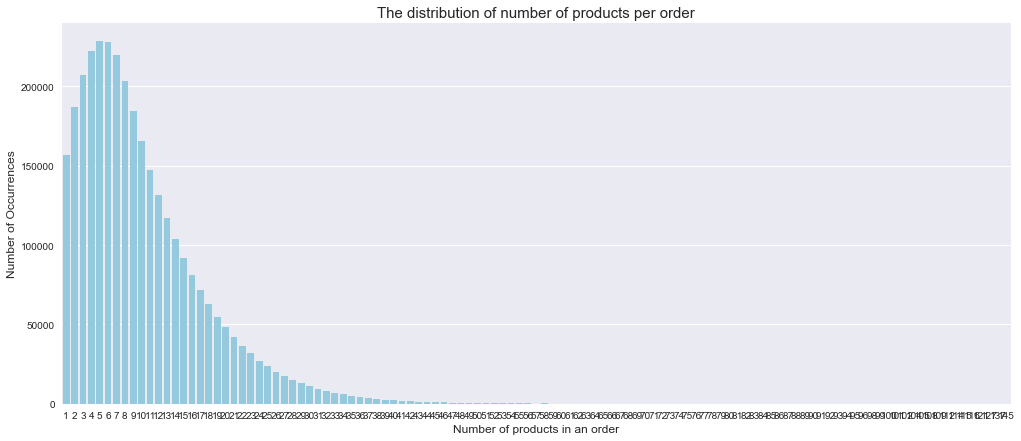

In [66]:
plt.figure(figsize=(17,7))
sns.countplot(data=product_orders, x=product_orders.groupby('order_id')['add_to_cart_order'].max(), color='skyblue')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Number of products in an order', fontsize=12)
plt.title("The distribution of number of products per order", fontsize=15)

This seems to follow a Poisson distribution.

### 5. What are the most common products people purchase ?

In [72]:
product_orders_wnames = product_orders.merge(goods, on='product_id', how='left')

In [92]:
product_orders_wnames.head(5)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2539329,1,prior,1,2,8,NaN,196,1,0,Soda,77,7,soft drinks,beverages
1,2539329,1,prior,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16,soy lactosefree,dairy eggs
2,2539329,1,prior,1,2,8,NaN,12427,3,0,Original Beef Jerky,23,19,popcorn jerky,snacks
3,2539329,1,prior,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,23,19,popcorn jerky,snacks
4,2539329,1,prior,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54,17,paper goods,household


In [73]:
product_count = product_orders_wnames.groupby('product_name').size()

In [74]:
product_count = product_count.sort_values(ascending=False).head(20)

In [75]:
product_count

product_name
Banana                      472565
Bag of Organic Bananas      379450
Organic Strawberries        264683
Organic Baby Spinach        241921
Organic Hass Avocado        213584
Organic Avocado             176815
Large Lemon                 152657
Strawberries                142951
Limes                       140627
Organic Whole Milk          137905
Organic Raspberries         137057
Organic Yellow Onion        113426
Organic Garlic              109778
Organic Zucchini            104823
Organic Blueberries         100060
Cucumber Kirby               97315
Organic Fuji Apple           89632
Organic Lemon                87746
Apple Honeycrisp Organic     85020
Organic Grape Tomatoes       84255
dtype: int64

### 5.1 What are the most common reordered products ?

In [76]:
r_count = product_orders_wnames.groupby('product_name')['reordered'].sum()

In [77]:
r_count = r_count.sort_values(ascending=False).head(20)

In [78]:
r_count

product_name
Banana                      398609
Bag of Organic Bananas      315913
Organic Strawberries        205845
Organic Baby Spinach        186884
Organic Hass Avocado        170131
Organic Avocado             134044
Organic Whole Milk          114510
Large Lemon                 106255
Organic Raspberries         105409
Strawberries                 99802
Limes                        95768
Organic Yellow Onion         79072
Organic Garlic               74663
Organic Zucchini             72165
Cucumber Kirby               67313
Organic Fuji Apple           63811
Organic Blueberries          62922
Apple Honeycrisp Organic     62510
Organic Lemon                60536
Organic Half & Half          59672
Name: reordered, dtype: int64

About 70% of top reordered products contain the word 'Organic'. If we model the reorderes on Departments, we will lose the 'Organic' information available about the product.

In [100]:
count_sets = product_orders_wnames[product_orders_wnames['department'] == 'produce'][product_orders_wnames['product_name'].str.contains("Organic")]['reordered'].value_counts()
count_sets

/Users/Kateryna/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


1    3431019
0    1682045
Name: reordered, dtype: int64

In [101]:
print('%s percent of products in this sample data set have been ordered' %(3431019/ (3431019 + 1682045)))

0.6710299343016243 percent of products in this sample data set have been ordered


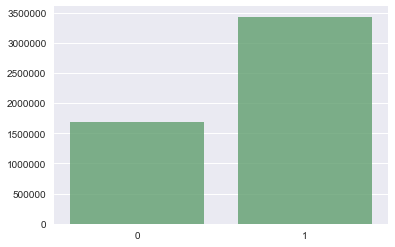

In [94]:
sns.barplot(count_sets.index, count_sets.values, alpha=0.8, color=color[1])

In [95]:
count_sets = product_orders_wnames[product_orders_wnames['department'] == 'produce']['reordered'].value_counts()

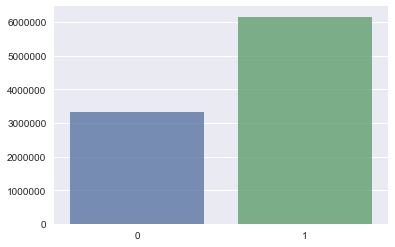

In [96]:
sns.barplot(count_sets.index, count_sets.values, alpha=0.8)

In [99]:
count_sets

1    6160710
0    3318581
Name: reordered, dtype: int64

In [102]:
print('%s percent of products in this sample data set have been ordered' %(6160710/ (6160710 + 3318581)))

0.6499125303780631 percent of products in this sample data set have been ordered


In [105]:
print('The percentage difference is %s' %((3431019/ (3431019 + 1682045)) - (6160710/ (6160710 + 3318581))))
print('2% is a good improvement on the baseline and I will need to find a way to keep it')

The percentage difference is 0.021117403923561207
2% is a good improvement on the baseline and I will need to find a way to keep it


### Let's explore the reordered variable in the context of departments.

## Exploratory Data Analysis on the Data Grouped by Departments

In [106]:
d_orders = orders.merge(order_products__prior, on='order_id', how='left')
d_orders = d_orders.merge(goods, on='product_id', how='left')

In [107]:
d_orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2539329,1,prior,1,2,8,NaN,196.0,1.0,0.0,Soda,77.0,7.0,soft drinks,beverages
1,2539329,1,prior,1,2,8,NaN,14084.0,2.0,0.0,Organic Unsweetened Vanilla Almond Milk,91.0,16.0,soy lactosefree,dairy eggs
2,2539329,1,prior,1,2,8,NaN,12427.0,3.0,0.0,Original Beef Jerky,23.0,19.0,popcorn jerky,snacks
3,2539329,1,prior,1,2,8,NaN,26088.0,4.0,0.0,Aged White Cheddar Popcorn,23.0,19.0,popcorn jerky,snacks
4,2539329,1,prior,1,2,8,NaN,26405.0,5.0,0.0,XL Pick-A-Size Paper Towel Rolls,54.0,17.0,paper goods,household


### 1. What is the number of orders per department?

In [108]:
y_d_orders = d_orders.groupby('department').size()

In [109]:
y_d_orders

department
alcohol             153696
babies              423802
bakery             1176787
beverages          2690129
breakfast           709569
bulk                 34573
canned goods       1068058
dairy eggs         5414016
deli               1051249
dry goods pasta     866627
frozen             2236432
household           738666
international       269253
meat seafood        708931
missing              69145
other                36291
pantry             1875577
personal care       447123
pets                 97724
produce            9479291
snacks             2887550
dtype: int64

In [110]:
n_d_orders = d_orders.groupby('department')['reordered'].sum()

In [111]:
n_d_orders

department
alcohol              87595.0
babies              245369.0
bakery              739188.0
beverages          1757892.0
breakfast           398013.0
bulk                 19950.0
canned goods        488535.0
dairy eggs         3627221.0
deli                638864.0
dry goods pasta     399581.0
frozen             1211890.0
household           297075.0
international        99416.0
meat seafood        402442.0
missing              27371.0
other                14806.0
pantry              650301.0
personal care       143584.0
pets                 58760.0
produce            6160710.0
snacks             1657973.0
Name: reordered, dtype: float64

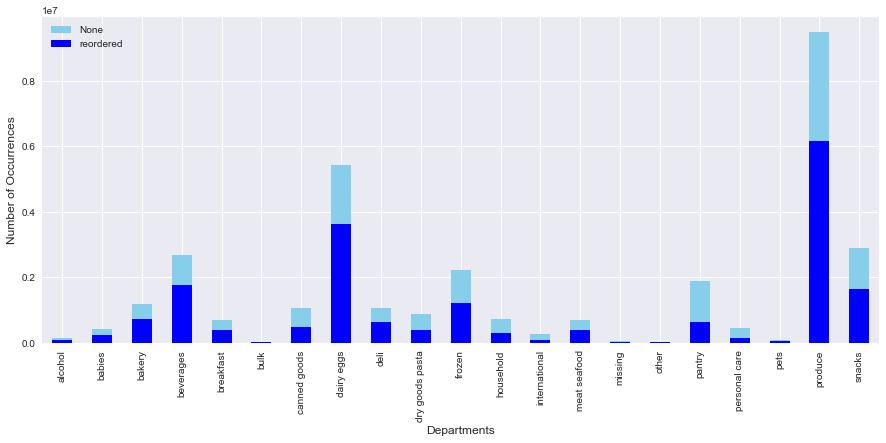

In [112]:
plt.figure(figsize=(15,6))
#n_d_orders.plot(kind='bar')
y_d_orders.plot(kind='bar', color='skyblue')
n_d_orders.plot(kind='bar', color='blue')
plt.legend()
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Departments', fontsize=12)

### 1.1 What is the percentage of reorders per department?

In [113]:
mean_d = d_orders.groupby('department')['reordered'].mean()

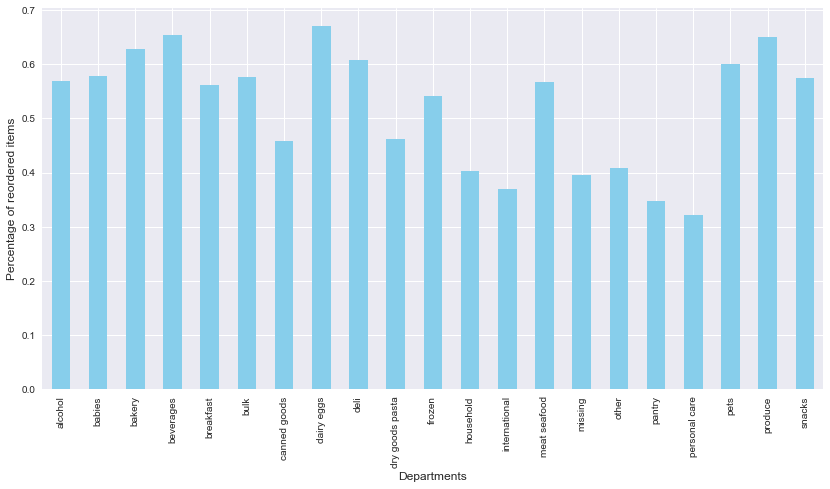

In [114]:
plt.figure(figsize=(14,7))
mean_d.plot(kind='bar', color='skyblue')
plt.ylabel('Percentage of reordered items', fontsize=12)
plt.xlabel('Departments', fontsize=12)

There are 6 departments with a reorder rate of above 60%

In [115]:
mean_d[mean_d > 0.6]

department
bakery        0.628141
beverages     0.653460
dairy eggs    0.669969
deli          0.607719
pets          0.601285
produce       0.649913
Name: reordered, dtype: float64

### 2. When do customers reorder?

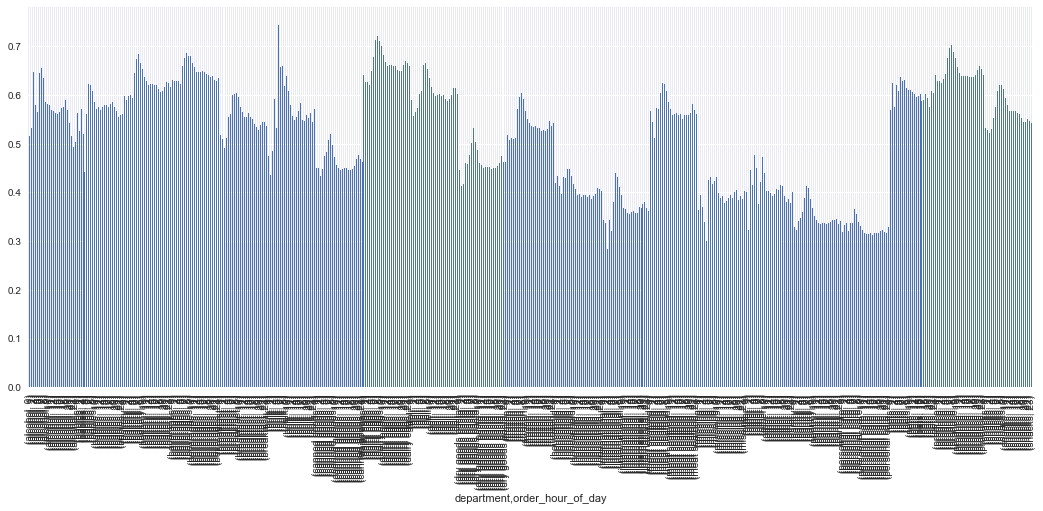

In [116]:
plt.figure(figsize=(18,7))
d_orders.groupby(['department', 'order_hour_of_day'])['reordered'].mean().plot(kind='bar')

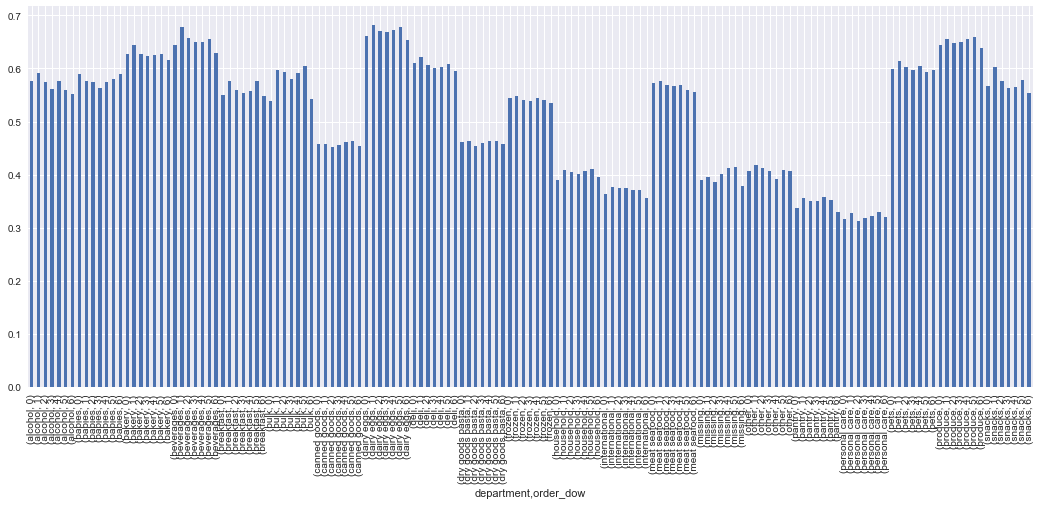

In [117]:
plt.figure(figsize=(18,7))
d_orders.groupby(['department', 'order_dow'])['reordered'].mean().plot(kind='bar')

## Heatmap of all variables

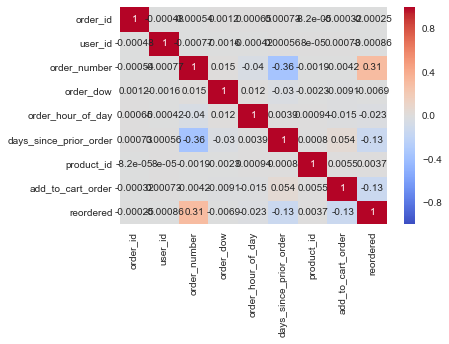

In [118]:
sns.heatmap(product_orders.corr(),cmap='coolwarm',annot=True)